In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
col_names = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=col_names)

In [ ]:
# g => 1 , !g => 0
df["class"] = (df["class"]=="g").astype(int)

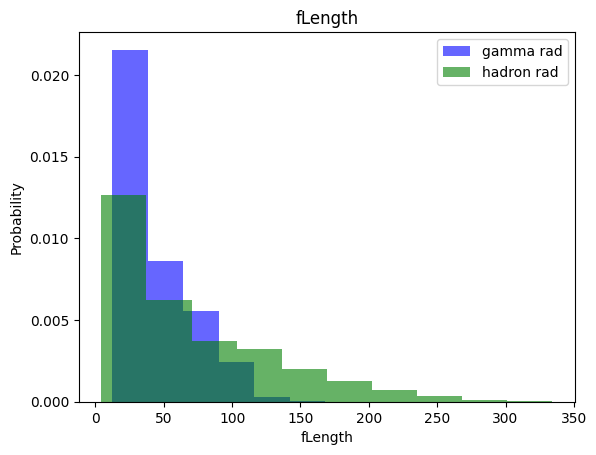

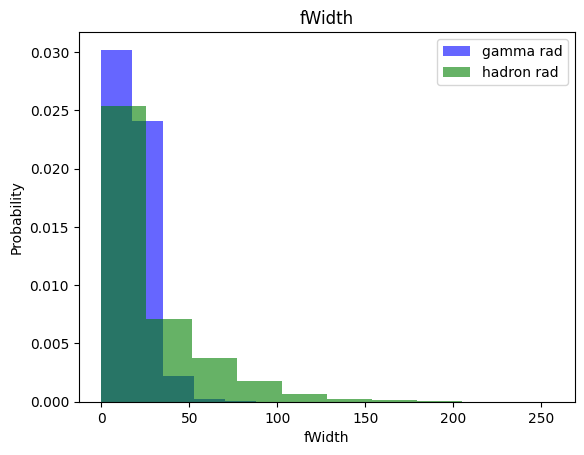

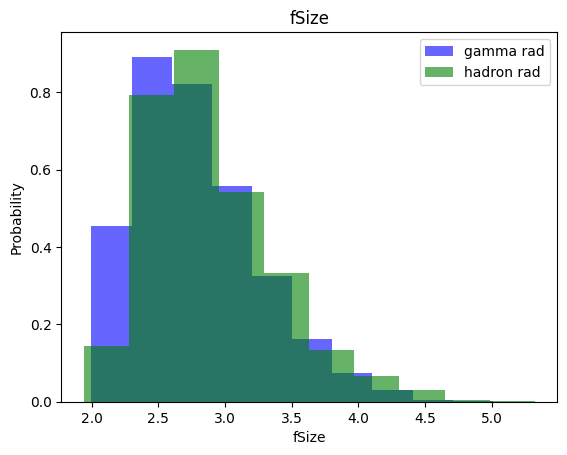

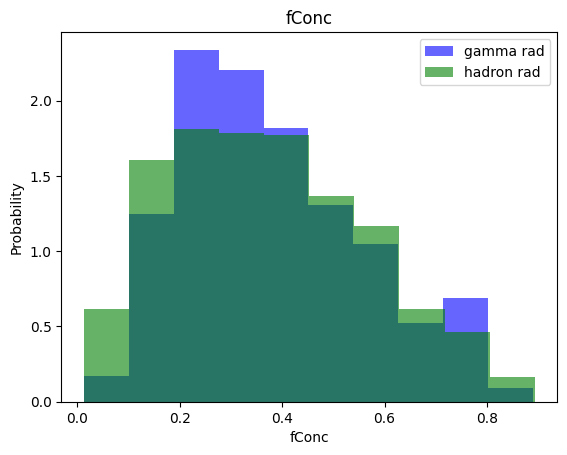

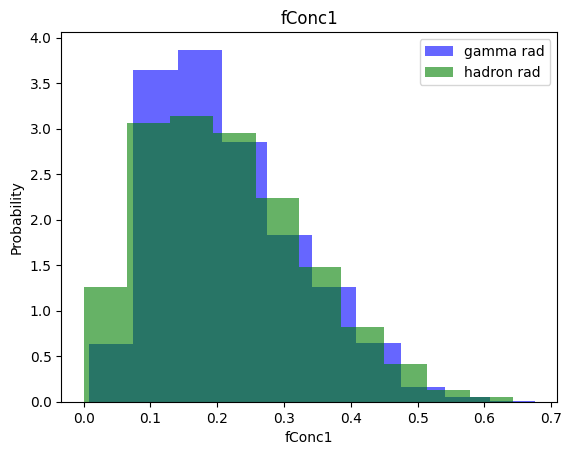

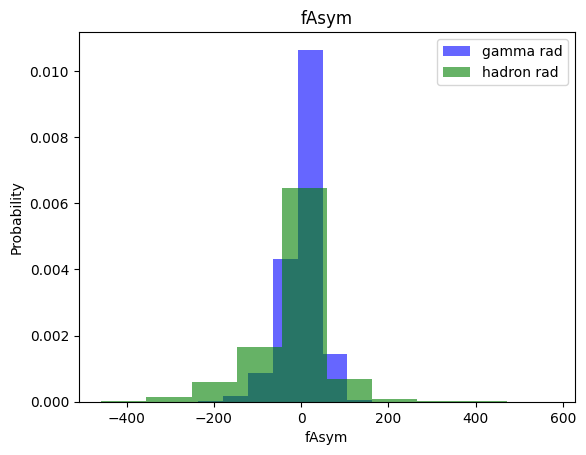

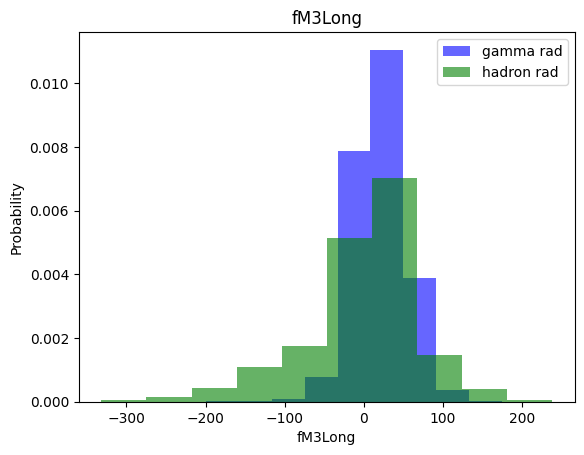

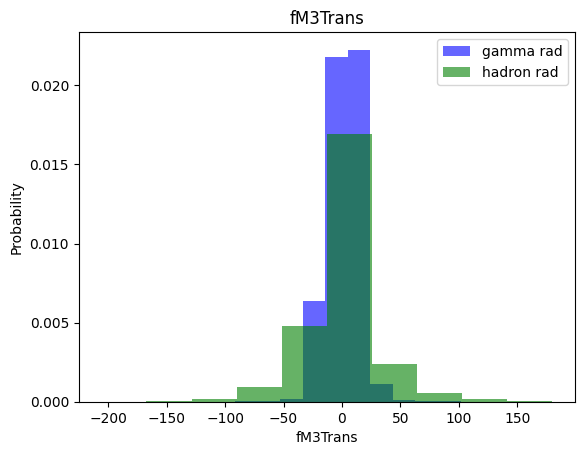

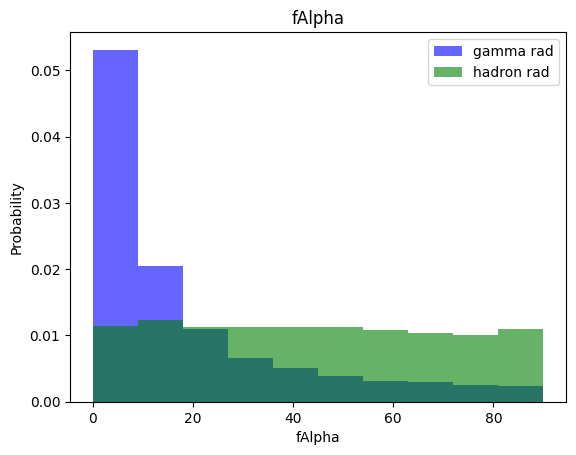

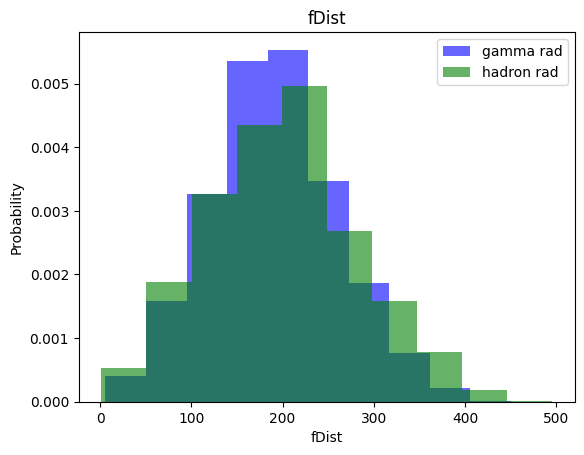

In [ ]:
for label in df.columns[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma rad', alpha=0.6, density=True)
  plt.hist(df[df["class"]==0][label], color='green', label='hadron rad', alpha=0.6, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [39]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    if oversample:
      ros = RandomOverSampler()
      x, y = ros.fit_resample(x, y)

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    data = np.hstack((x, np.reshape(y, (-1, 1))))
    return data, x, y

In [25]:
# runned BEFORE over sampling feature!
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0]))

7388
4024


In [40]:
# scaling dataset
train, x_train, y_train = scale_dataset(train, oversample=True)

# runned AFTER over sampling feature!
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0]))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'